机器学习的两大领域是分类和回归，分类是回答yes or no问题，比如这封邮件是不是垃圾邮件；回归解决的是程度问题("how much" questions)，比如这个房子多少钱，一个视频会被播放多少秒？

本课先学习线性回归问题，然后如何优化，最后如何泛化到非线性例子。

# 1.用数据拟合直线

首先随意初定一条直线

![](./lr001.png)

观测每个数据点，根据观测值调整直线。

# 2 直线移动

调整参数w1,w2值，分别调整直线的斜率和y轴截距。

![](./lr002.png)

# 3 绝对值技巧

假如点位于直线上方，可以这样调整直线

lr003.png
![](./lr003.png)

点位于直线下方：

lr004.png
![](./lr004.png)


# 平方技巧

lr005.png
![](./lr005.png)

这种方法，可以忽略掉点在直线下方的情况。


In [1]:
#绝对值方法测试
v=[[2,-2],[5,6],[-4,-4],[-7,1],[8,14]]
m = len(v)
sum = 0
for item in v:
    x,y = item[0],item[1]
    
    y_hat = 1.2*x + 2
    sum += abs(y_hat - y)
    
print(sum/m)

3.88


In [2]:
#平方方法测试
v=[[2,-2],[5,6],[-4,-4],[-7,1],[8,14]]
m = len(v)
sum = 0
for item in v:
    x,y = item[0],item[1]
    
    y_hat = 1.2*x + 2
    sum += (y_hat - y)**2
    
print(sum/(2*m))

10.692000000000002


# 梯度下降法

梯度下降的工作方式就像下山，

lr014
![...](./lr014.png)

误差就像这座山，要下山，需要减少高度，下山等价于线性拟合问题，不停的重复寻找下山最快的路(梯度方向)，当到达山底，也找到了最佳拟合线，这就是**梯度下降**。

用数学语言描述，下山方法，就是计算误差函数关于每个权重的梯度，梯度方向总是指向误差函数增大(或减小)最多的方向。

沿着梯度走一步，表示用原权重$w_i$，减去误差相对于权重$w_i$的梯度。实际上还要用学习速率乘以误差的梯度，来控制步长。

这样误差函数不断减小，接近最小值。重复这一过程，就可以得到误差最小或很好的值。
![...](./lr015.png)

# 平均绝对值误差

计算方法：
lr006.png
![](./lr006.png)

用简化的二维图，展示用梯度下降法拟合最佳直线

lr008.png
![](./lr008.png)

# 均方误差
计算方法：
这里的1/2是为了方便后续导数计算，对收敛过程每任何影响。

lr009.png

![](./lr009.png)

用简化二维图展示，梯度下降法拟合最佳直线

lr010.png
![](./lr010.png)

# 最小化误差函数

目前学习了两个算法，用于拟合直线，

其一是使用绝对值技巧和平方技巧，

其二时最小化任意误差函数，即平均绝对误差和均方误差，

其实，这两个方法完全相同：

梯度下降法，最小化平均绝对误差与绝对值技巧完全相同；

lr011.png
![](./lr011.png)

梯度下降法，最小化均方误差与平方技巧完全相同；

lr012.png
![](./lr012.png)


以均方误差为例，梯度下降中，最小误差函数分别对斜率$w_1$和y轴截距$w_2$的导数，刚好就是点到直线的垂直距离，和到y轴的距离。这与平方技巧完全相同。
lr013.png
![](./lr013.png)

绝对值误差同理，注意符号问题。

## 误差函数求导过程
误差定义如下：
$$
Error = \frac{1}{2}(y - \hat{y})^2
$$

预测函数为:
$\hat{y} = w_1x + w_2$

因此，误差函数对$w_1$求导：
$$
\frac{\partial}{\partial w_1}Error = \frac{\partial Error}{\partial\hat{y}} \frac{\hat{y}}{\partial w_1} \\
 = -(y - \hat{y}) w_1
$$

因此，误差函数对$w_2$求导：
$$
\frac{\partial}{\partial w_2}Error = \frac{\partial Error}{\partial\hat{y}} \frac{\hat{y}}{\partial w_2} \\
 = -(y - \hat{y})
$$

ps: 均方误差和总平方误差本质是一样，因为误差结果是线性的，选择哪个，只是选择了不同的学习速率。

在现实中，我们可以借助算法判断什么样的学习速率合适。

# 小批量梯度下降法

**随机梯度下降法**：逐个地在每个数据点应用均方（或绝对）误差，并重复这一流程很多次。

**批量梯度下降法**：同时在每个数据点应用均方（或绝对）误差，并重复这一流程很多次。
lr013.png
![](./lr016.png)

实际上，在大部分情况下，两种都不适用，思考以下情形：如果你的数据十分庞大，两种方法的计算速度都将会很缓慢。

线性回归的最佳方式是将数据拆分成很多小批次。每个批次都大概具有相同数量的数据点。然后使用每个批次更新权重。这种方法叫做**小批次梯度下降法**。

使用小批次梯度下降法，特别注意一点，所有数据样本，应该随机采用分批次。

lr017.png
![](./lr017.png)

data.type: <class 'numpy.ndarray'> <built-in method reshape of numpy.ndarray object at 0x7f9273ef0bc0>
regression_coef: [array([0., 0.])]


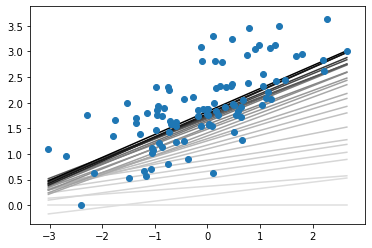

In [3]:
import numpy as np
%matplotlib inline
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)


# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Fill in code
    # compute errors
    y_pred = np.matmul(X,W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    print("regression_coef:",regression_coef)
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    print("data.type:",type(data),data.reshape)
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        #print(color)
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color) #color=[0.5, 0.5, 0.5]
    plt.scatter(X, y, zorder = 3)
    #plt.show()
    plt.savefig("mini_batch_GD.png")

# 平均绝对值VS均方误差

平均绝对值误差和均方误差，到底哪个更好，没有固定答案，比如下面拟合问题

lr019.png

![](./lr019.png)

这里，三根线，绝对值误差时相等的，而均方误差不等。

lr020.png
![](./lr020.png)

图像化观测

lr018.png
![](./lr018.png)


In [4]:

import numpy as np
arr1=np.array([1,2,3])
arr2=np.array([4,5,6])
print(np.vstack((arr1,arr2)))
 

[[1 2 3]
 [4 5 6]]


In [5]:
print(np.hstack((arr1,arr2)))
 
a1=np.array([[1,2],[3,4],[5,6]])
a2=np.array([[7,8],[9,10],[11,12]])
print(a1)
print(a2)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]
[[ 7  8]
 [ 9 10]
 [11 12]]


In [6]:
import numpy as np
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
np.matmul(a, b)

array([[4, 1],
       [2, 2]])